[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Zaba_et_al_2025/GMWL.ipynb)

## Global Meteoric Water Line
GMWL is a relation between oxygen-18 $^{18}O$ and deuterium $D$.
In Craig 1961 (https://doi.org/10.1126/science.133.3465.1702) it is expressed as $\delta^{18}O$ to $\delta D$.
Here we provide general form for this relation but using $\alpha(T)$.


In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from PySDM import Formulae
from PySDM.physics import si
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [3]:
T = 283.15 * si.K

In [6]:
f = {}
alphas = {}
variants = {
    "HoritaAndWesolowski1994",
    "Majoube1971",
    "VanHook1968"
}
for variant in variants:
    f[variant] = Formulae(isotope_equilibrium_fractionation_factors=variant)
    alphas[variant] = {}
    alphas[variant]['18O'] = f[variant].isotope_equilibrium_fractionation_factors.alpha_l_18O
    alphas[variant]['2H'] = f[variant].isotope_equilibrium_fractionation_factors.alpha_l_2H

In [7]:
def a_coeff(alpha_D, alpha_O, B):
    return (alpha_D - 1 - B)/(alpha_O - 1)

def b_coeff(alpha_D, alpha_O, A):
    return alpha_D - 1 - A * (alpha_O - 1)

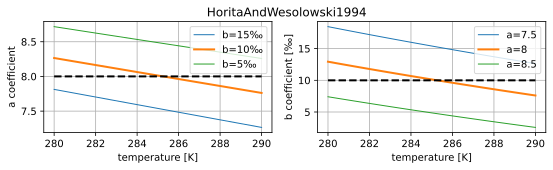

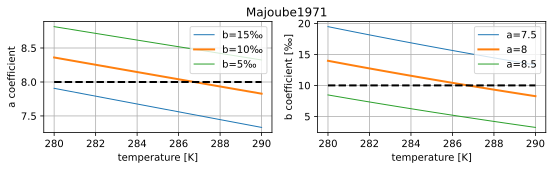

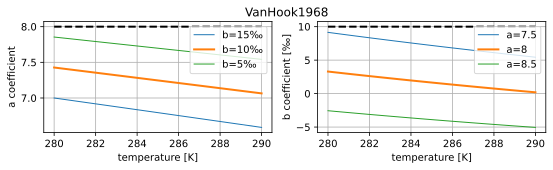

In [14]:
T = np.linspace(280, 290) * si.K
thick = 2
thin = 1
lines = {}
for variant in variants:
    lines[variant] = {}
    fig, axs = pyplot.subplots(1, 2, figsize=(9, 2))
    for b in (.015, .01, .005):
        label = f"b={b*1000:.3g}"
        lines[variant][label] = a_coeff(alphas[variant]['2H'](T), alphas[variant]['18O'](T), b)
        axs[0].plot(T, lines[variant][label], label=f"b={b*1000:.3g}‰", linewidth=thick if b==.01 else thin)
    axs[0].set_ylabel('a coefficient')
    axs[0].hlines(8, xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')
    
    for a in (7.5, 8, 8.5):
        label = f'{a=}'
        lines[variant][label] = 1000*b_coeff(alphas[variant]['2H'](T), alphas[variant]['18O'](T), a)
        plot_b = axs[1].plot(T, lines[variant][label], label=label, linewidth=thick if a==8 else thin)
    axs[1].set_ylabel('b coefficient [‰]')
    axs[1].hlines(10, xmin=T[0], xmax=T[-1], color='k', linewidth=thick, linestyle='--')
    
    for ax in axs:
        ax.legend()
        ax.grid()
        ax.set_xlabel('temperature [K]')
    fig.suptitle(variant)
    show_plot(f'fig_{variant}.pdf')

In [15]:
lines

{'HoritaAndWesolowski1994': {'b=15': array([7.81309809, 7.80187842, 7.79066046, 7.77944419, 7.7682296 ,
         7.75701666, 7.74580537, 7.73459571, 7.72338765, 7.7121812 ,
         7.70097632, 7.689773  , 7.67857123, 7.667371  , 7.65617228,
         7.64497506, 7.63377932, 7.62258505, 7.61139224, 7.60020086,
         7.5890109 , 7.57782234, 7.56663518, 7.55544939, 7.54426495,
         7.53308186, 7.5219001 , 7.51071964, 7.49954049, 7.48836261,
         7.47718599, 7.46601063, 7.45483649, 7.44366358, 7.43249186,
         7.42132133, 7.41015198, 7.39898377, 7.38781671, 7.37665077,
         7.36548594, 7.3543222 , 7.34315955, 7.33199795, 7.3208374 ,
         7.30967788, 7.29851937, 7.28736187, 7.27620535, 7.2650498 ]),
  'b=10': array([8.26535679, 8.25502239, 8.24469067, 8.23436164, 8.22403526,
         8.21371153, 8.20339044, 8.19307195, 8.18275607, 8.17244277,
         8.16213204, 8.15182387, 8.14151823, 8.13121512, 8.12091452,
         8.11061642, 8.1003208 , 8.09002764, 8.07973693, 8